In [1]:
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
with open('Folsom-2505-data.json', 'r') as file:
    data = json.load(file)
print(data.keys())

dict_keys(['haloIDs', 'hasGSE', 'hasLMC', 'scale_factors', 'scaled', 'speed_gal', 'speed_geo', 'unscaled'])


See the README for a description of these entries. Below are a few plots showing the data

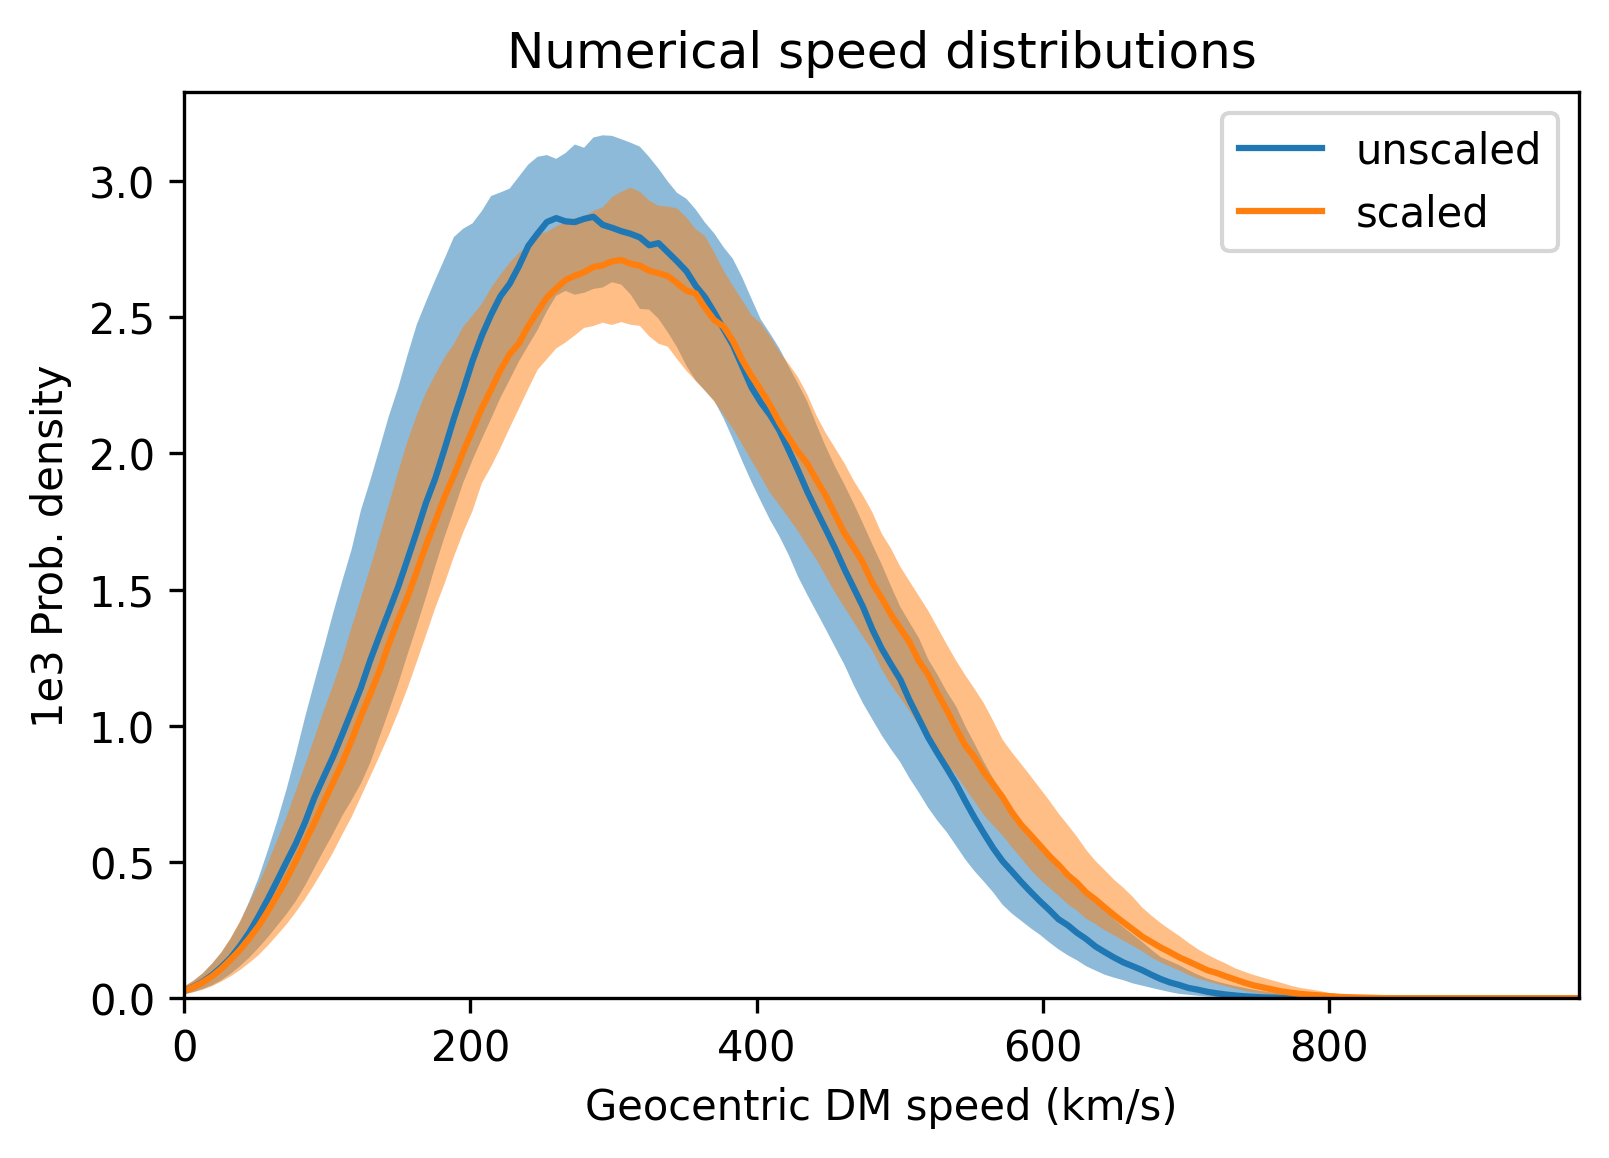

In [3]:
unscaled_fv_lab = data['unscaled']['geocentric']['speed_dists']
scaled_fv_lab = data['scaled']['geocentric']['speed_dists']

plt.figure()
for fvs, label in [(unscaled_fv_lab, 'unscaled'), (scaled_fv_lab, 'scaled'),]:
    plt.plot(data['speed_geo'], np.median(fvs, axis = 0), label=label)
    plt.fill_between(data['speed_geo'], *np.quantile(fvs, stats.norm.cdf([-1, 1]), axis=0), alpha=0.5)
plt.ylim(0, None)
plt.xlim(0, max(data['speed_geo']))
plt.legend()
plt.xlabel('Geocentric DM speed (km/s)')
plt.ylabel('1e3 Prob. density')
plt.title('Numerical speed distributions')
plt.show()

In [4]:
from scipy.special import erf
def trunc_mwb(v, v0, vesc):
    k0 = (np.pi * v0**2)**(3/2)
    k1 = k0 * (erf(vesc/v0) - 2/np.sqrt(np.pi) * vesc/v0 * np.exp(-vesc**2/v0**2))
    fv3d = np.where(v > vesc, 0, np.exp(-v**2/v0**2))
    return 4*np.pi * v**2 * fv3d/k1

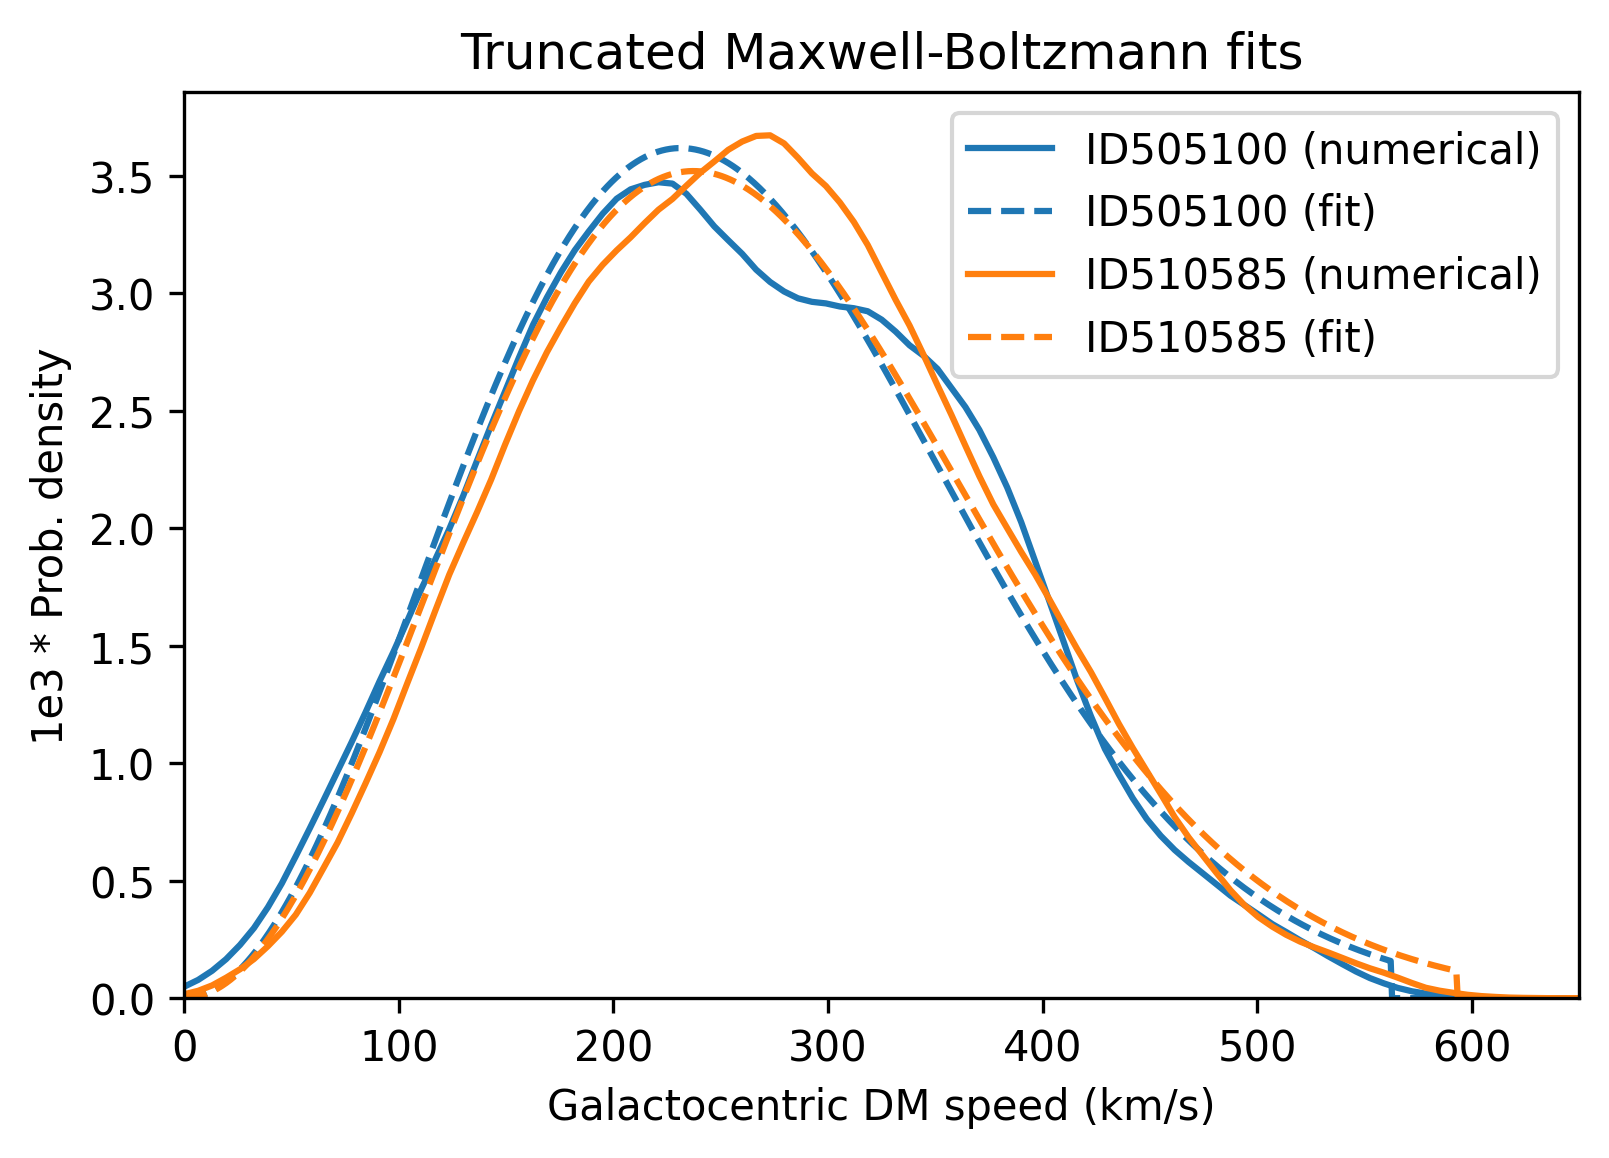

In [5]:
plt.figure()
fit_params = data['scaled']['galactocentric']['maxwellians']
xax = np.linspace(0, 650, num=1000)
for i, index in enumerate(np.where(np.logical_and(data['hasGSE'], data['hasLMC']))[0]):
    plt.plot(data['speed_gal'], data['scaled']['galactocentric']['speed_dists'][index], label=f'ID{data["haloIDs"][index]} (numerical)', color=f'C{i}')
    plt.plot(xax, 1e3 * trunc_mwb(xax, fit_params['v0'][index], fit_params['vesc'][index]), label=f'ID{data["haloIDs"][index]} (fit)', linestyle='dashed', color=f'C{i}')
plt.legend()
plt.xlim(0, xax.max())
plt.ylim(0, None)
plt.xlabel('Galactocentric DM speed (km/s)')
plt.ylabel('1e3 * Prob. density')
plt.title('Truncated Maxwell-Boltzmann fits')
plt.show()

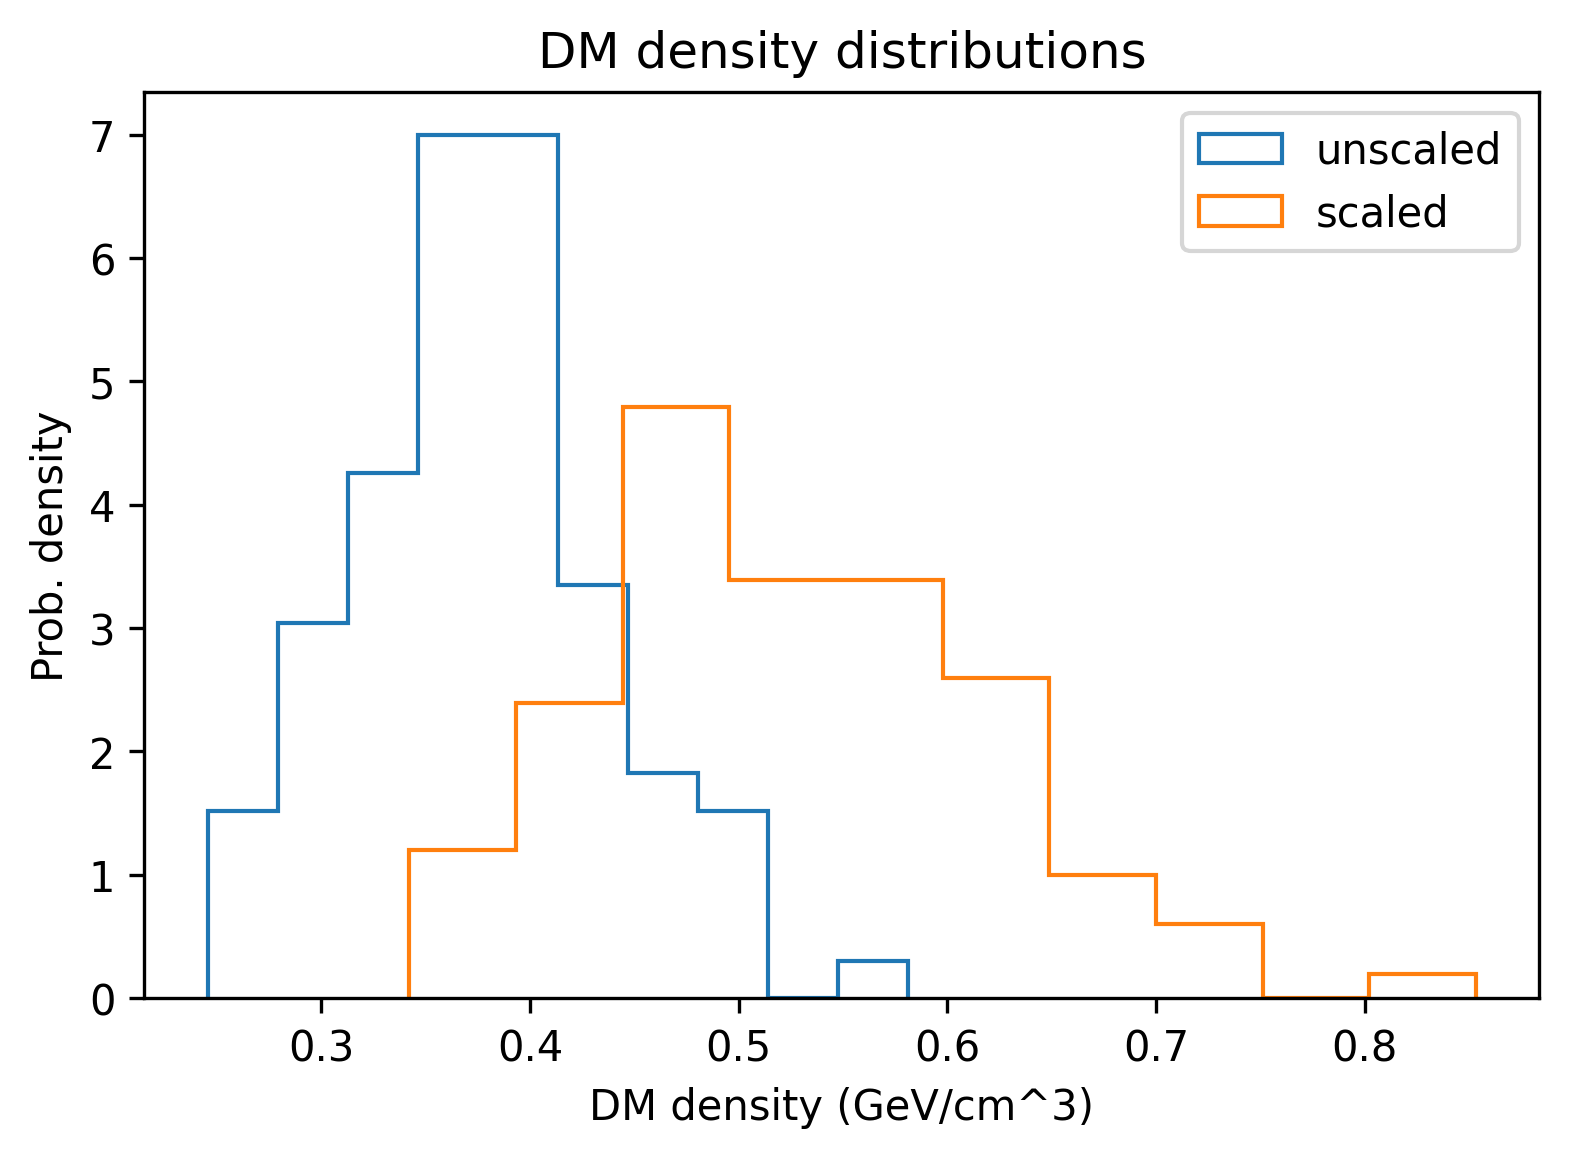

In [6]:
plt.figure()
plt.hist(data['unscaled']['densities'], density=True, histtype='step', label='unscaled')
plt.hist(data['scaled']['densities'], density=True, histtype='step', label='scaled')
plt.xlabel('DM density (GeV/cm^3)')
plt.ylabel('Prob. density')
plt.legend()
plt.title('DM density distributions')
plt.show()